# DA-05: Stanford Open Policing Project
***
### Name: Bismay Parija
### Roll: 20CS30067
***
In this project, we aim to explore the following questions:
1. Does gender affect who gets searched during a stop?
2. How does drug activity change by time of day?
3. Test the following hypothesis: "The average age of the white males who were stopped for speeding is less than 34."
4. The variation of accident frequencies w.r.t. the time of day.

***

# Table of Contents
- [ 1. Dataset](#1)
  - [ 1.1. Overview](#1.1)
  - [ 1.2. Exploratory Data Analysis](#1.2)
  - [ 1.3. Visualising the Dataset](#1.3)
- [ 2. How Gender Affects Who Gets Searched During a Stop](#2)
- [ ### 3. Change in Drug Activity w.r.t. Time of Day](#3)
- [ 4. Hypothesis Testing](#4)
- [ 5. Variation of Arrest Frequencies w.r.t. Time of Day](#5)

***

## Packages

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from scipy.stats import ttest_1samp

***

<a name='1'></a>
## 1. Dataset

***

<a name='1.1'></a>
### 1.1. Overview

On a typical day in the United States, police officers make more than 50,000 traffic stops. This dataset includes 9 Mb of stop data from Rhode Island, covering all of 2013 onwards.

In [249]:
df = pd.read_csv("dataset\police_project.csv")
# Display a snapshot of the dataset
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


***

Display basic information about the dataset

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

***

Columns:
- stop_date: Date of the police stop.
- stop_time: Time of the police stop.
- county_name: Name of the county (with some missing values).
- driver_gender: Gender of the driver (M for Male, F for Female).
- driver_age_raw: Raw data for driver's age.
- driver_age: Processed driver's age.
- driver_race: Race of the driver.
- violation_raw: Original description of the violation.
- violation: Categorized description of the violation.
- search_conducted: Boolean indicating whether a search was - conducted during the stop.
- search_type: Type of search conducted, with some missing values.
- stop_outcome: Outcome of the stop (e.g., Citation, Arrest Driver).
- is_arrested: Boolean indicating whether the driver was arrested.
- stop_duration: Duration of the stop (e.g., 0-15 Min, 16-30 Min).
- drugs_related_stop: Boolean indicating whether the stop was related to drugs.

***

Display summary statistics

In [251]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [252]:
df.shape

(91741, 15)

***

<a name='1.2'></a>
### 1.2. Exploratory Data Analysis

***

#### Categorical variables
Display unique values for categorical columns

In [253]:
print(df.driver_gender.value_counts())
print(df.driver_race.value_counts())
print(df.violation.value_counts())
print(df.search_conducted.value_counts())
print(df.search_type.value_counts())
print(df.stop_outcome.value_counts())
print(df.is_arrested.value_counts())
print(df.stop_duration.value_counts())
print(df.drugs_related_stop.value_counts())

M    62895
F    23511
Name: driver_gender, dtype: int64
White       62158
Black       12244
Hispanic     9507
Asian        2259
Other         240
Name: driver_race, dtype: int64
Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64
False    88545
True      3196
Name: search_conducted, dtype: int64
Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Pr

***

#### Handling missing values

In [254]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

All the data is missing from the column `county_name` so we will drop this column.

In [255]:
df.drop('county_name', axis=1, inplace=True)
df.shape

(91741, 14)

***

The `driver_gender` and  column will be critical to many of our analyses. Since only a small fraction of rows are missing `driver_gender`, we'll drop those rows from the dataset.

In [256]:
df.dropna(axis=0, subset=["driver_gender"], inplace=True)
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_age_raw            1
driver_age              293
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83210
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
dtype: int64

Similarly for `driver_age`.

In [257]:
df.dropna(axis=0, subset=["driver_age"], inplace=True)
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_age_raw            0
driver_age                0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           82920
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
dtype: int64

***

Since most rows are missing from the column `search_type` and it is not relevant to the following analysis, we can drop the column entirely.

In [258]:
df.drop('search_type', axis=1, inplace=True)
df.shape

(86113, 13)

***

#### Handling outliers
Identify potential outliers, especially in numerical columns. We can check for outliers using visualisations such as a box plot.

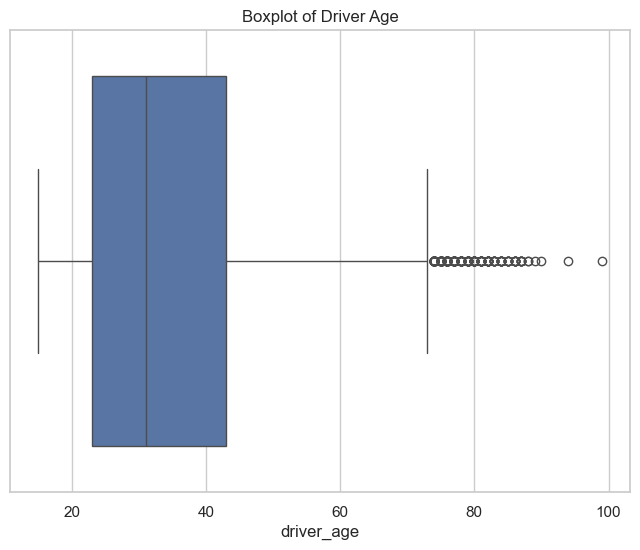

In [259]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['driver_age'])
plt.title('Boxplot of Driver Age')
plt.show()

Winsorizing involves capping extreme values at a specified percentile. This can be useful when we want to reduce the impact of extreme values without removing them entirely.Therefore, we'll winsorize `driver_age` values at the 5th and 95th percentile.

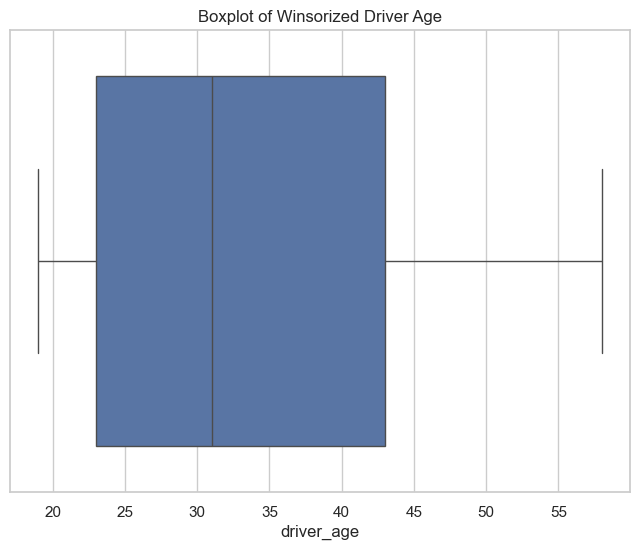

In [260]:
winsorize(df['driver_age'], limits=(0.05, 0.05), inplace=True)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['driver_age'])
plt.title('Boxplot of Winsorized Driver Age')
plt.show()

***

#### Fixing a data type

The `is_arrested` column currently has the `object` data type. We'll change the data type to `bool` as this will enable us to use mathematical operations on the ``is_arrested`` column that would not be possible otherwise.

In [261]:
df['is_arrested'] = df['is_arrested'].astype('bool')
df['is_arrested']

0        False
1        False
2        False
3         True
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: is_arrested, Length: 86113, dtype: bool

***

The `stop_date` column is currently in a string format, so we can use the `to_datetime` function from the `pandas` library to convert the `stop_date` values into a datetime object in the format `YYYY-MM-DD`.

In [262]:
df['stop_date'] = pd.to_datetime(df['stop_date'], format='%Y-%m-%d', errors='coerce')
df['stop_date']

0       2005-01-02
1       2005-01-18
2       2005-01-23
3       2005-02-20
4       2005-03-14
           ...    
91736   2015-12-31
91737   2015-12-31
91738   2015-12-31
91739   2015-12-31
91740   2015-12-31
Name: stop_date, Length: 86113, dtype: datetime64[ns]

The `stop_time` column is also in a string format, so we can similarly convert the `stop_time` values into a datetime object and then extract the hour value.

In [263]:
df['stop_time'] = pd.to_datetime(df['stop_time'], format='%H:%M', errors='coerce').dt.hour
# df['stop_time'] = df['stop_time'].dt.time
df['stop_time']

0         1
1         8
2        23
3        17
4        10
         ..
91736    20
91737    20
91738    20
91739    21
91740    22
Name: stop_time, Length: 86113, dtype: int64

<a name='1.3'></a>
### 1.3. Visualising the Dataset

#### Histograms

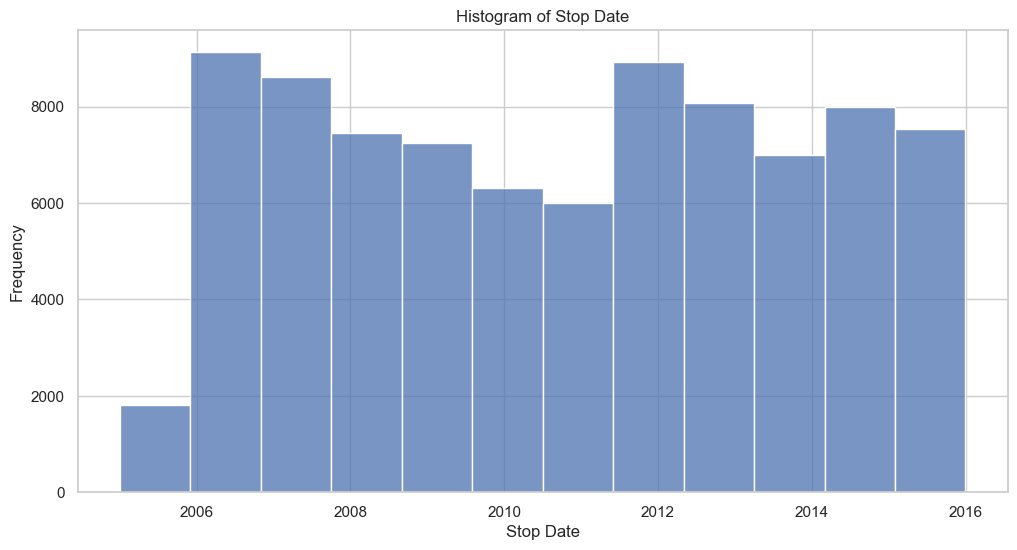

In [264]:
# Set the style for the plots
sns.set(style="whitegrid")

# Histogram for stop date
plt.figure(figsize=(12, 6))
sns.histplot(df['stop_date'], bins=12, kde=False)
plt.xlabel('Stop Date')
plt.ylabel('Frequency')
plt.title('Histogram of Stop Date')
plt.show()


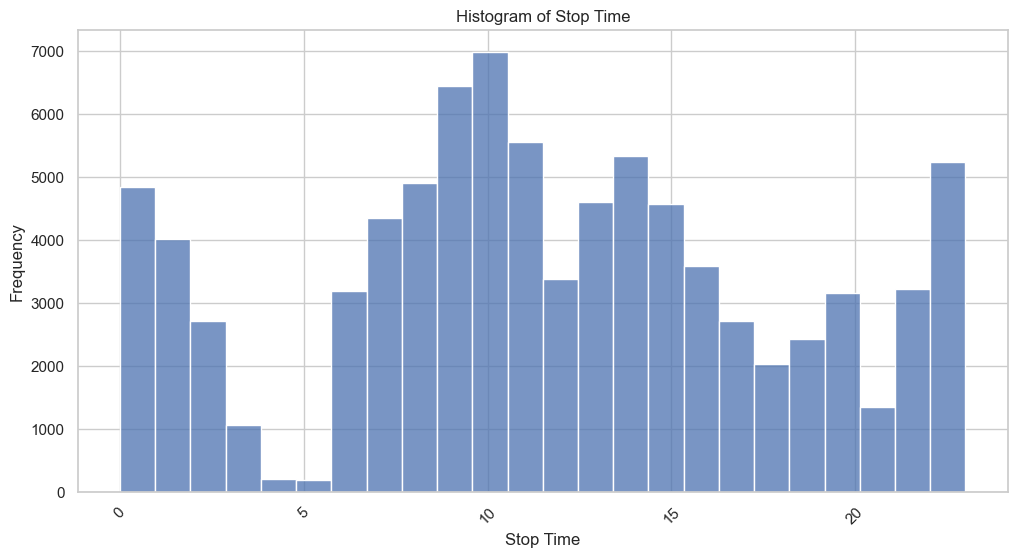

In [265]:
# Histogram for 'stop_time'
plt.figure(figsize=(12, 6))
sns.histplot(df['stop_time'], bins=24, kde=False)
plt.title('Histogram of Stop Time')
plt.xlabel('Stop Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# plt.gca().set_xticklabels(df['stop_time'].dt.strftime('%H:%M'))

plt.show()

Text(0, 0.5, 'Frequency')

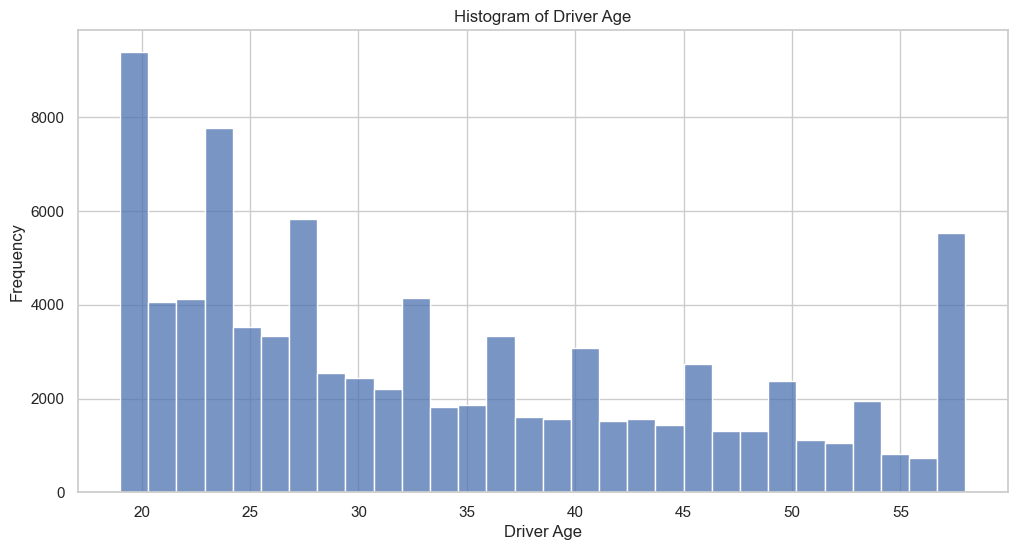

In [266]:
# Histogram for 
plt.figure(figsize=(12, 6))
sns.histplot(df['driver_age'], bins=30)
plt.title('Histogram of Driver Age')
plt.xlabel('Driver Age')
plt.ylabel('Frequency')

***

#### Bar Graphs

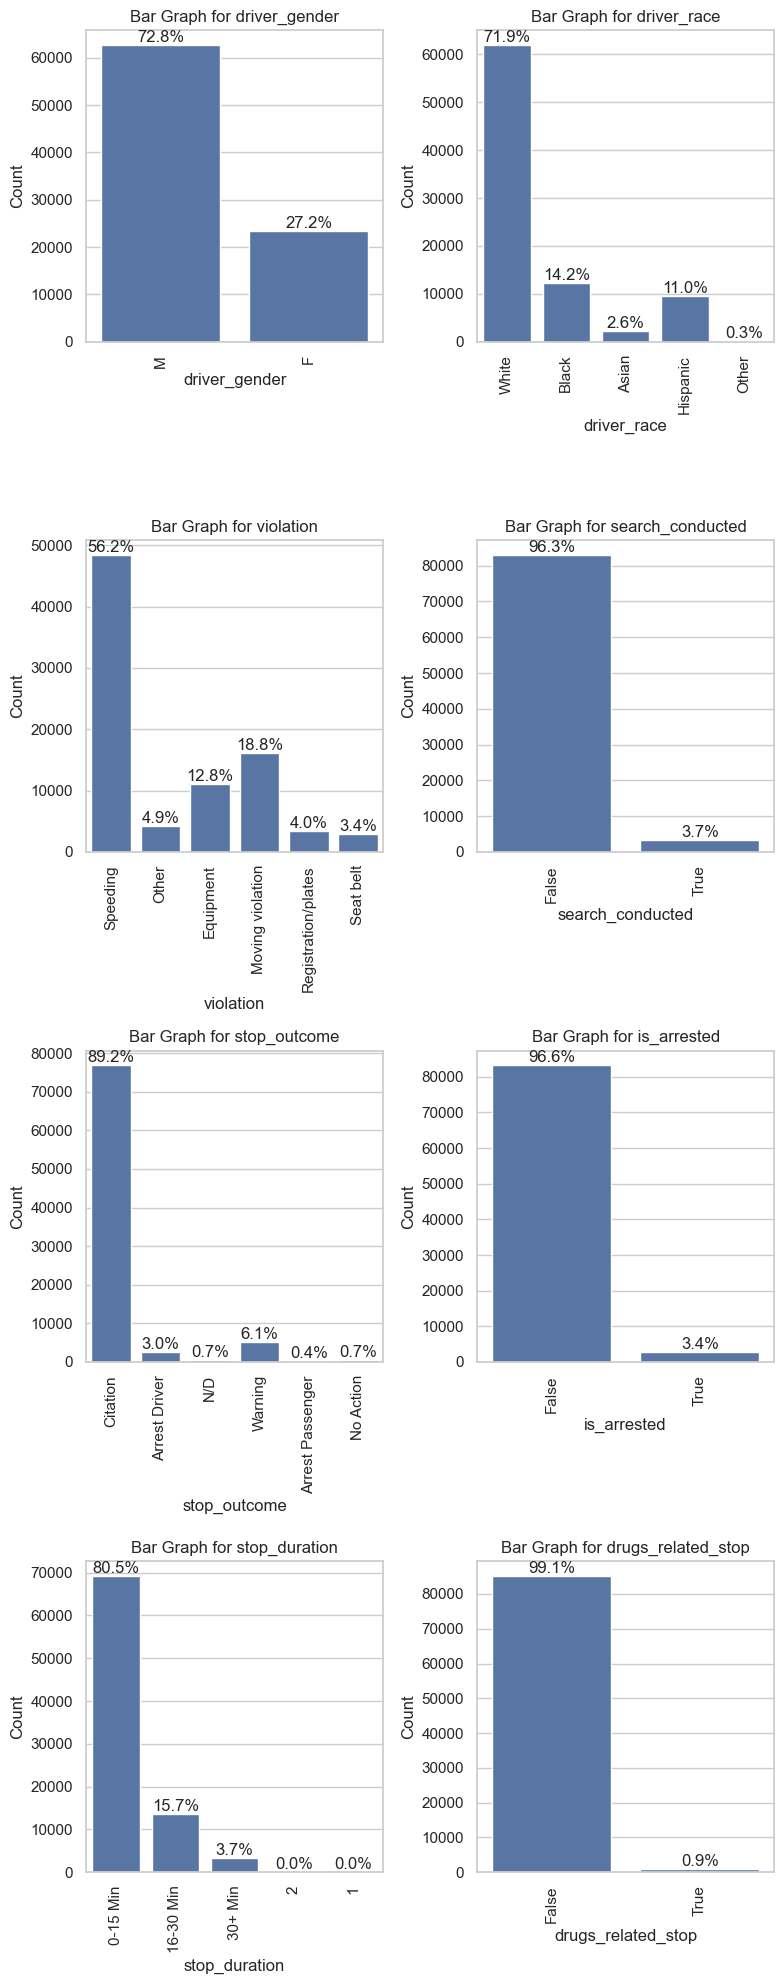

In [267]:
# List of columns to create bar graphs
bar_columns = ['driver_gender', 'driver_race', 'violation', 'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 20))
fig.subplots_adjust(hspace=0.5)

# Plot bar graphs for each column
for i, column in enumerate(bar_columns):
    row = i // 2
    col = i % 2
    total_count = len(df[column])
    sns.countplot(x=column, data=df, ax=axes[row, col])
    # Display percentages on top of the bars
    for p in axes[row, col].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[row, col].annotate(percentage, (x, y), ha='center', va='bottom')
    axes[row, col].set_title(f'Bar Graph for {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

***

<a name='2'></a>
### 2. How Gender Affects Who Gets Searched During a Stop

In [268]:
print(df.search_conducted.value_counts())
print(df.search_conducted.value_counts(normalize=True))
print(df.loc[df.search_conducted, 'driver_gender'].value_counts())
print(df.loc[df.search_conducted, 'driver_gender'].value_counts(normalize=True))

False    82920
True      3193
Name: search_conducted, dtype: int64
False    0.962921
True     0.037079
Name: search_conducted, dtype: float64
M    2722
F     471
Name: driver_gender, dtype: int64
M    0.85249
F    0.14751
Name: driver_gender, dtype: float64


From all `86113` cases, only `3103`, i.e., `0.037079%` are stopped. Out of the `3103` cases of stopping, `2722`, i.e., `0.85249%` are male and `471`, i.e., `0.14751%` are female.

***

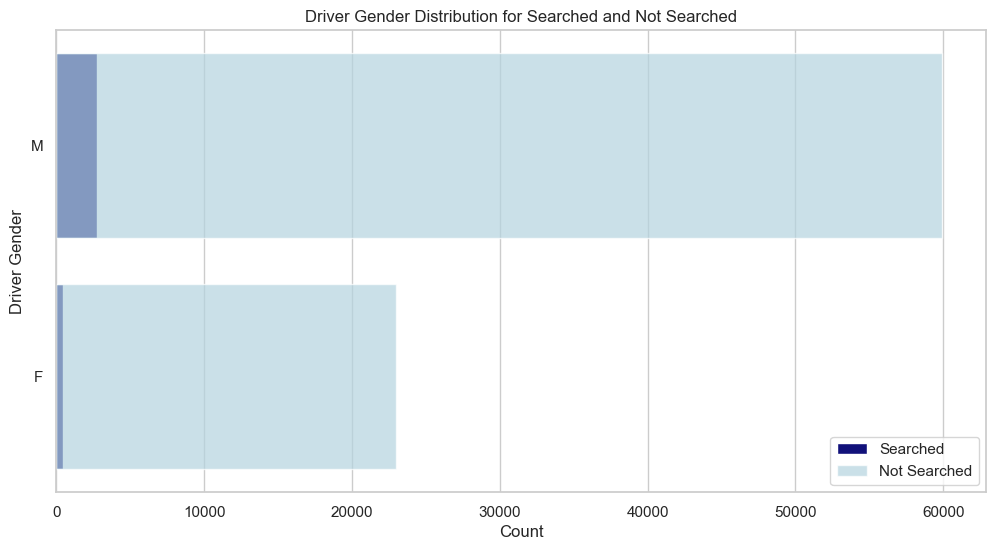

In [269]:
# Filter data for searched and not searched
searched_data = df.loc[df['search_conducted'] == True, 'driver_gender']
not_searched_data = df.loc[df['search_conducted'] == False, 'driver_gender']

# Count and plot for searched with dark blue
plt.figure(figsize=(12, 6))
sns.countplot(y=searched_data, color='darkblue', alpha=1.0, label='Searched')

# Count and plot for not searched with light blue
sns.countplot(y=not_searched_data, color='lightblue', alpha=0.7, label='Not Searched')

plt.title('Driver Gender Distribution for Searched and Not Searched')
plt.xlabel('Count')
plt.ylabel('Driver Gender')
plt.legend()
plt.show()

***

In [270]:
# Calculate the total number of stops for each gender
total_stops = df['driver_gender'].value_counts()

# Calculate the number of stops for men and women
searches_by_gender = df[df['search_conducted'] == True]['driver_gender'].value_counts()

# Calculate the percentage of stops for each gender
percentage_searches = (searches_by_gender / total_stops) * 100

# Display the results
print("Percentage of men searched:", percentage_searches['M'])
print("Percentage of women searched:", percentage_searches['F'])

Percentage of men searched: 4.344841896917749
Percentage of women searched: 2.007330378452097


It is hard to conclude that there is a causation between gender and who gets searched at a stop, although men are searched marginally more, indicating some positive correlation.

<a name='3'></a>
### 3. Change in Drug Activity w.r.t. Time of Day

In [271]:
print(df.drugs_related_stop.value_counts())
print(df.drugs_related_stop.value_counts(normalize=True))
print(df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].value_counts())

False    85299
True       814
Name: drugs_related_stop, dtype: int64
False    0.990547
True     0.009453
Name: drugs_related_stop, dtype: float64
0     103
23     92
1      60
13     50
22     47
2      46
14     44
9      43
10     42
11     41
15     31
19     30
20     27
18     22
16     22
21     20
3      20
12     16
17     16
7      15
8      13
6      10
4       3
5       1
Name: stop_time, dtype: int64


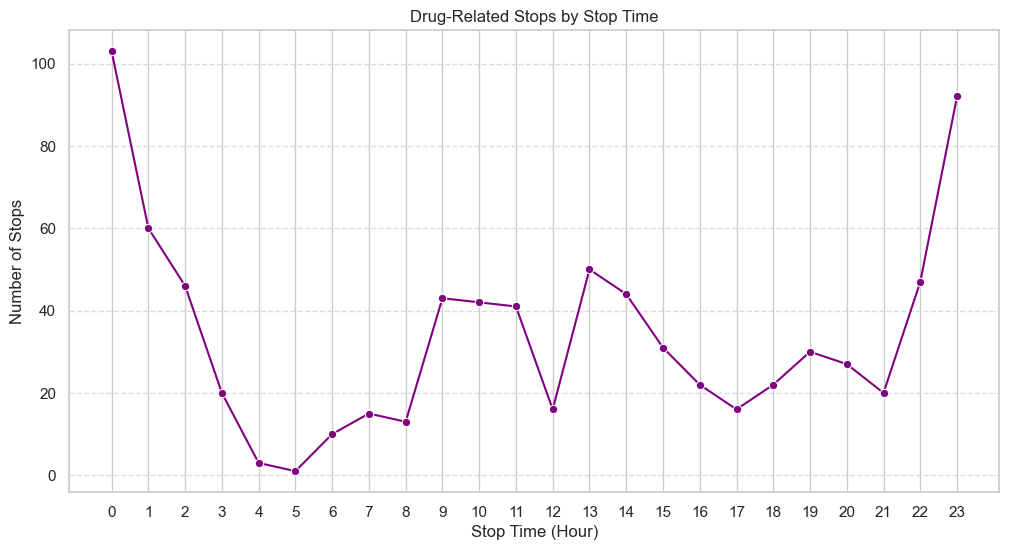

In [272]:
# Filter data for drug-related stops
drug_related_stops = df[df['drugs_related_stop'] == True]

# Count the number of drug-related stops for each stop time
drug_stops_by_time = drug_related_stops['stop_time'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=drug_stops_by_time.index, y=drug_stops_by_time.values, marker='o', color='purple')
plt.title('Drug-Related Stops by Stop Time')
plt.xlabel('Stop Time (Hour)')
plt.ylabel('Number of Stops')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***

<a name='4'></a>
### 4. Hypothesis Testing

In [273]:
# Extract data for white males stopped for speeding
white_males_speeding = df[(df['driver_race'] == 'White') & (df['driver_gender'] == 'M') & (df['violation'] == 'Speeding')]['driver_age']

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(white_males_speeding, 34)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Check the significance level (considered to be 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.\nThe average age is less than 34.")
else:
    print("Fail to reject the null hypothesis.\nThere is not enough evidence to conclude that the average age is less than 34.")

T-statistic: 1.196092575664271
P-value: 0.23167154424463016
Fail to reject the null hypothesis.
There is not enough evidence to conclude that the average age is less than 34.


***

<a name='5'></a>
### 5. Variation of Arrest Frequencies w.r.t. Time of Day

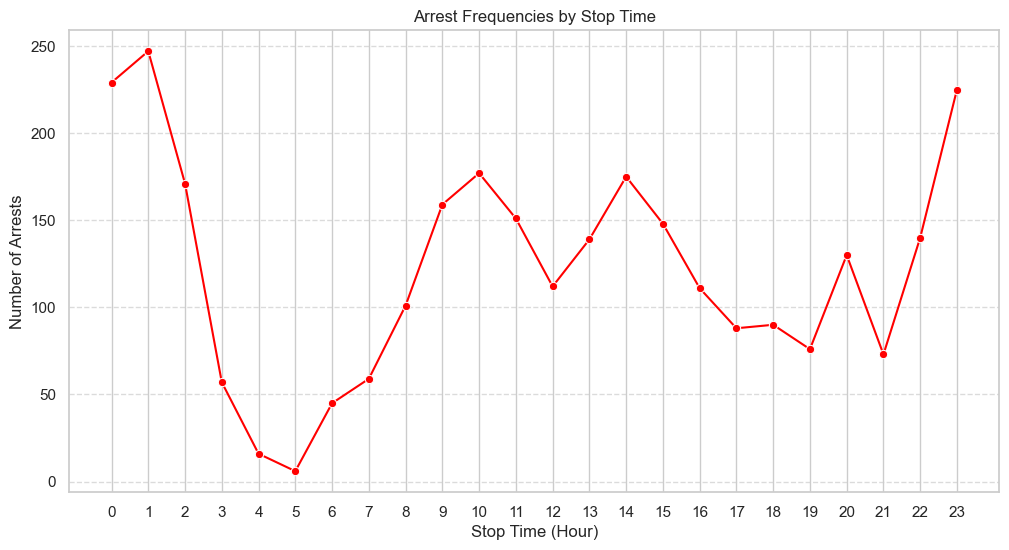

In [274]:
# Filter data for arrests
arrest_data = df[df['is_arrested'] == True]

# Count the number of arrests for each stop time
arrests_by_time = arrest_data['stop_time'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=arrests_by_time.index, y=arrests_by_time.values, marker='o',color='red')
plt.title('Arrest Frequencies by Stop Time')
plt.xlabel('Stop Time (Hour)')
plt.ylabel('Number of Arrests')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Note**: No information about Accidents in the dataset. So, we substitute it with Arrests.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


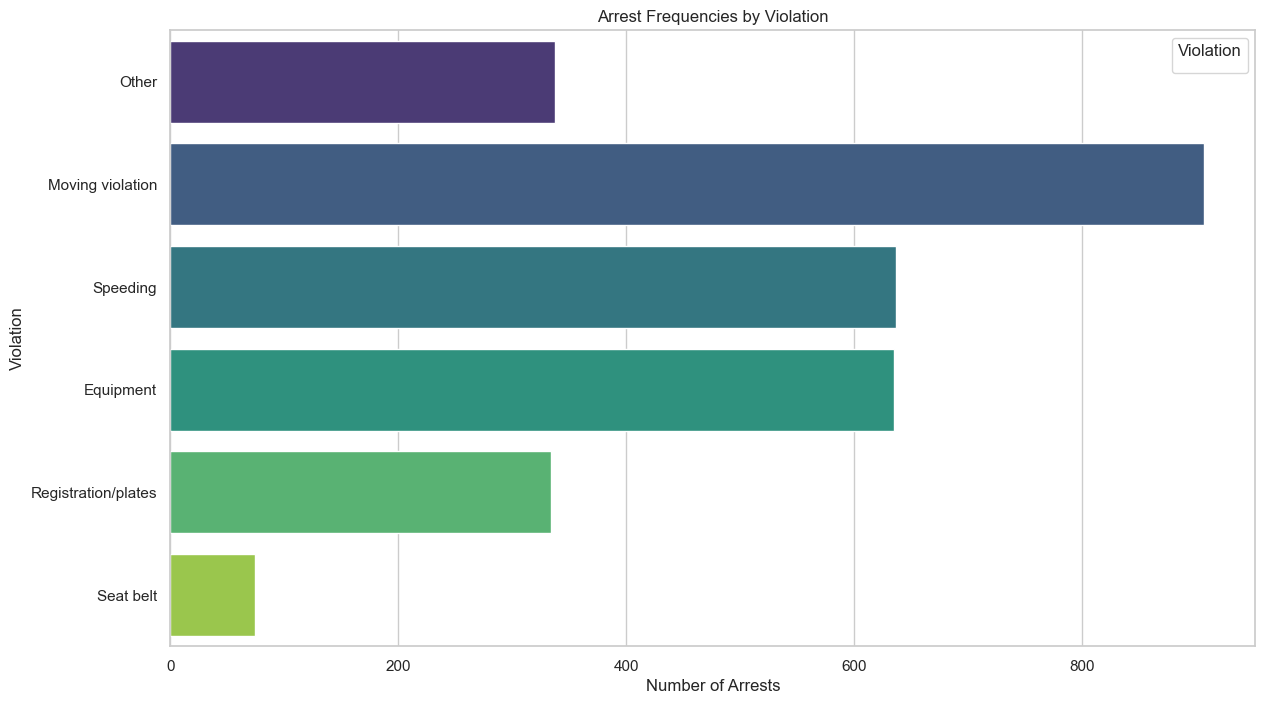

In [275]:
# Plotting arrests vs. violations
plt.figure(figsize=(14, 8))
sns.countplot(y=arrest_data['violation'], hue=arrest_data['violation'], palette='viridis')
plt.title('Arrest Frequencies by Violation')
plt.xlabel('Number of Arrests')
plt.ylabel('Violation')
plt.legend(title='Violation', loc='upper right')
plt.show()

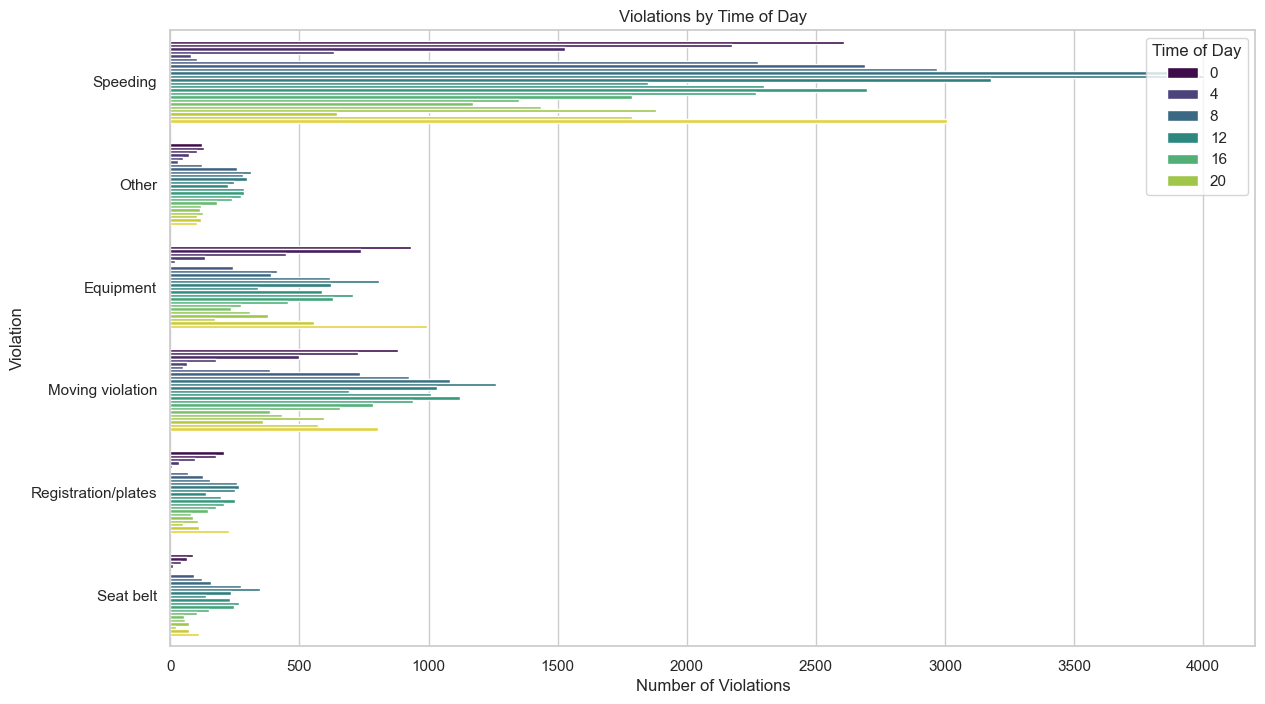

In [276]:
# Plotting violations vs. time of day
plt.figure(figsize=(14, 8))
sns.countplot(y=df['violation'], hue=df['stop_time'], palette='viridis')
plt.title('Violations by Time of Day')
plt.xlabel('Number of Violations')
plt.ylabel('Violation')
plt.legend(title='Time of Day', loc='upper right')
plt.show()